# Task 1: Prediction Using Supervised Machine Learning.
##### ● Predict the percentage of an student based on the no. of study hours.
##### ● Data can be found at http://bit.ly/w-data
##### ● What will be predicted score if a student studies for 9.25 hrs/ day?


In [35]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [53]:
# Reading Data from dataset
data = pd.read_csv ('C:\\Users\\Anil Kumar Patel\\Desktop\\Spark Foundation\data.csv')
data.head(20)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [60]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


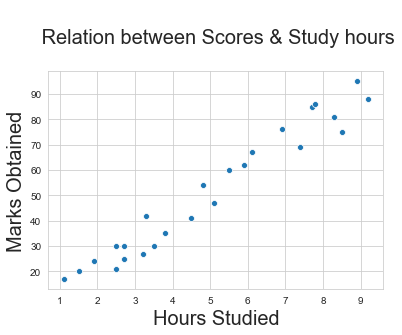

In [54]:
# Visualization of data

sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('\n Relation between Scores & Study hours\n',size=20)
plt.ylabel('Marks Obtained', size=20)
plt.xlabel('Hours Studied', size=20)
plt.show()

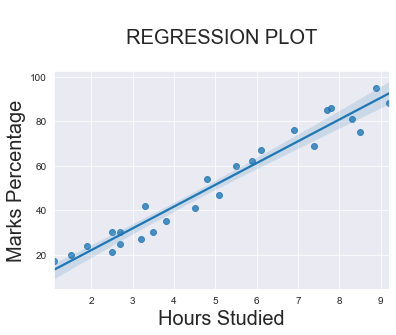

In [59]:
# Display Regression Plot
sns.set_style('darkgrid')
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('\nREGRESSION PLOT\n',size=20)
plt.ylabel('Marks Percentage', size=20)
plt.xlabel('Hours Studied', size=20)
plt.show()

# Training The Model

### >>Splitting the data

In [39]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### >>Data fitting into model

In [40]:
#Linear Regression

regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Training Successful")

Model Training Successful


### >>Predicting the marks obtained by Students

In [41]:
predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Study Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Study Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### >>Comparison between actual and predicted results

In [42]:
pd.DataFrame(np.c_[val_y,predict_y], columns=["Original Marks","Predicted Marks"])

,Original Marks,Predicted Marks
0,20.0,16.844722
1,27.0,33.745575
2,69.0,75.500624
3,30.0,26.786400
4,62.0,60.588106
5,35.0,39.710582
6,24.0,20.821393


### >>Visual representation of comparison

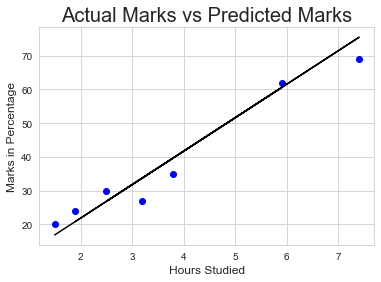

Actual Score of student : Blue 
 
Predicted Score of student : Black


In [46]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, predict_y, color='Black')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Marks in Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

print("Actual Score of student : Blue \n ")
print("Predicted Score of student : Black")

### >>Mean Absolute Error in Model

In [47]:
# Calculating the accuracy of the model
print('MAE (Mean absolute error): ',mean_absolute_error(val_y,predict_y))

MAE (Mean absolute error):  4.130879918502486


# Predicted score of a student if he/she studies for 9.25 hrs/ day?

In [50]:
hours = [9.25]
Predict_score = regression.predict([hours])
print("Predicted Score = {} %".format(round(Predict_score[0],3)))

Predicted Score = 93.893 %
